
Notebook: 01_linear_model_and_neuron.ipynb

Purpose:
Build intuition for a single neuron by implementing a linear model from scratch.

Focus:
- Linear regression as a neuron
- Forward pass as an explicit linear transformation
- Understanding why stacking linear layers adds no expressive power

Scope:
- No activation functions
- No automatic differentiation
- No neural network frameworks

Key question:
What can and cannot be represented by a purely linear neuron?

Notes:
This notebook is intentionally minimal. The goal is clarity of the forward computation, not performance or abstraction.

Author: Sheila Muñoz
Date: 2025-12-12

In [1]:
## Import necessary libraries and set random seed

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

## 1 — Synthetic Data

We start with the simplest possible setup: one input feature, one output, and a known linear relationship (`y = 2.7x - 0.8 + noise`). Because we control the ground truth, we can verify that our learning algorithm actually recovers the correct parameters.

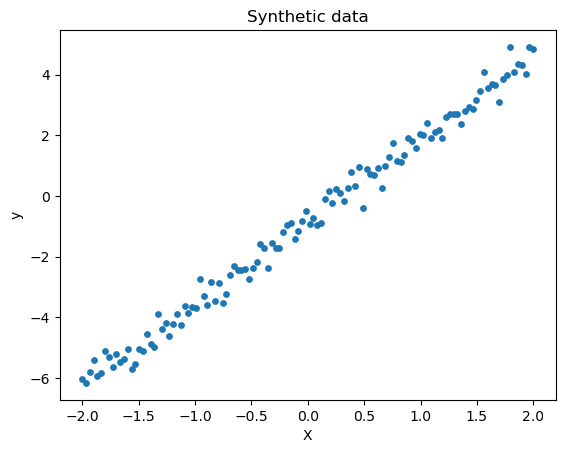

In [3]:
## Generate synthetic data (1 feature)

n = 120
X = np.linspace(-2, 2, n).reshape(-1, 1)

# True parameters for synthetic data generation
true_w = 2.7
true_b = -0.8
y = true_w * X + true_b + np.random.randn(n, 1) * 0.35

plt.figure()
plt.scatter(X, y, s=15)
plt.title("Synthetic data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [ ]:
## Core functions (forward pass + loss )

def predict(X: np.array, w: np.array, b: float) -> np.array:
    """Forward pass of a single linear neuron: y = Xw + b."""
    return X @ w + b

def mse(y_true: np.array, y_pred: np.array) -> float:
    """Mean squared error between targets and predictions."""
    return np.mean((y_true - y_pred) ** 2)

In [ ]:
## Quick sanity check (random params)
W0 = np.random.randn(1, 1)
b0 = float(np.random.randn())
print("MSE with random params:", mse(y, predict(X, W0, b0)))


MSE with random params: 0.006671342326326805


## 2 — Closed-Form Solution

For 1D linear regression we can solve for the optimal weights analytically. This gives us a ground-truth baseline: if gradient descent works, it should converge to the same values.

In [ ]:
def fit_closed_form_1d(X: np.array, y: np.array) -> tuple[float, float]:
    """Compute optimal w, b for 1D linear regression using the normal equation."""
    x_mean = np.mean(X)
    y_mean = np.mean(y)
    w = np.sum((X - x_mean) * (y - y_mean )) / np.sum((X - x_mean) ** 2)
    b = y_mean - w * x_mean
    return w, b

w_cf, b_cf = fit_closed_form_1d(X, y)
print("Closed-form w, b:", w_cf, b_cf)

y_cf = w_cf * X + b_cf

plt.figure()
plt.scatter(X, y, s=15, label="data")
plt.plot(X, y_cf, linewidth=2, label="closed-form fit")
plt.title("Closed-form linear fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## 3 — Gradient Descent

Now we solve the same problem iteratively. We derive the MSE gradients by hand:

- `dW = (2/n) * X^T (Xw + b - y)`
- `db = (2/n) * sum(Xw + b - y)`

If our derivation and implementation are correct, GD should converge to the same `w, b` as the closed-form solution.

In [ ]:
def gradients(X: np.ndarray, y: np.ndarray, W: np.ndarray, b: float) -> tuple[np.ndarray, float]:
    """Compute dW and db for MSE loss on a linear model."""
    n = X.shape[0]
    y_pred = predict(X, W, b)
    err = (y_pred - y)  
    dW = (2.0 / n) * (X.T @ err)  
    db = (2.0 / n) * np.sum(err)
    return dW, db

def gradient_descent(X: np.array, y: np.array, lr: float, n_iters: int) -> tuple[np.array, float, list]:
    """Train a linear neuron with gradient descent. Returns (W, b, loss_history)."""
    d = X.shape[1]
    W = np.zeros((d, 1))
    b = 0.0
    losses = []

    for t in range(n_iters):
        y_pred = predict(X, W, b)
        loss = mse(y, y_pred)
        losses.append(loss)

        dW, db = gradients(X, y, W, b)
        W = W - lr * dW
        b = b - lr * db

    return W, b, losses


W_gd, b_gd, losses = gradient_descent(X, y, lr=0.2, n_iters=200)
print("GD W, b:", W_gd[0, 0], b_gd)
print("Final loss:", losses[-1])

plt.figure()
plt.plot(losses)
plt.title("Gradient descent loss")
plt.xlabel("step")
plt.ylabel("MSE")
plt.show()

y_gd = predict(X, W_gd, b_gd)

plt.figure()
plt.scatter(X, y, s=15, label="data")
plt.plot(X, y_cf, linewidth=2, label="closed-form")
plt.plot(X, y_gd, linewidth=2, label="gradient descent")
plt.title("Fits comparison")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## 4 — Multiple Features

The same neuron generalises to any number of inputs: `z = Xw + b` where `X` is now `(n, d)`. We verify this by fitting a 3-feature problem with the same `gradient_descent` function — no code changes needed.

True W: [ 1.2 -2.   0.7]
GD   W: [ 1.1871827  -1.98590602  0.69607483]
True b: 0.4
GD   b: 0.438768782771707
Final loss: 6.389773332290195e-33


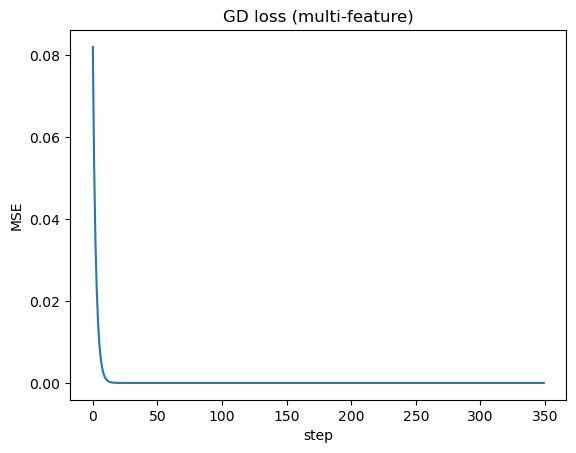

In [8]:
## Generalize to multiple features
# Still the same neuron: z = XW + b

n = 200
d = 3

X = np.random.randn(n, d)

W_true = np.array([[1.2], [-2.0], [0.7]])
b_true = 0.4
noise = 0.25 * np.random.randn(n, 1)

y_multi = X @ W_true + b_true + noise

W_gd_m, b_gd_m, losses_m = gradient_descent(X, y_multi, lr=0.15, n_iters=350)

print("True W:", W_true.ravel())
print("GD   W:", W_gd_m.ravel())
print("True b:", b_true)
print("GD   b:", b_gd_m)
print("Final loss:", losses_m[-1])

plt.figure()
plt.plot(losses_m)
plt.title("GD loss (multi-feature)")
plt.xlabel("step")
plt.ylabel("MSE")
plt.show()

## Takeaway\n\n- A neuron computes a linear combination: **z = Xw + b**\n- Training = minimising a loss via gradient descent\n- Gradients are partial derivatives with respect to parameters\n- This is the foundation of all neural networks — but a single linear neuron can only represent linear relationships. Notebook 02 shows what happens when we add non-linearity.